# Daily planet

In [1]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('grid.txt',header=None,sep=' ')
grille = np.array(df.drop(15, axis=1))
grille

array([[ 1, 19,  9,  9,  8, 18, 13,  0, 13,  2, 18, 18, 17,  9,  0],
       [16,  1, 10,  8,  6, 16, 16, 18, 14, 18, 15, 17, 20, 15, 17],
       [ 5,  3, 19, 14,  1,  0,  3,  8, 15, 12,  2, 15, 15, 15,  2],
       [ 8, 20,  7, 20,  6, 14, 12,  4,  3,  7, 19, 11, 15,  8,  8],
       [15,  8,  8, 14, 12, 16,  8,  2, 10, 16, 17,  1, 12,  0, 17],
       [ 0, 12, 18, 13,  1,  3,  2, 17, 10,  7,  4, 15, 19,  8, 13],
       [ 2, 13, 20,  1, 19,  4,  1,  1,  0, 14,  4,  3, 12,  2,  8],
       [11,  3,  2, 20,  9, 15,  1, 18, 14, 13,  2,  3, 17, 13, 20],
       [16,  5,  9,  9,  5, 17, 16,  4, 18,  9,  1,  3,  7,  6, 13],
       [17, 17,  1,  6, 10,  3, 15, 13,  7,  1,  9, 10,  9, 18, 13],
       [ 3, 20, 19,  3, 15,  4, 17,  0, 18, 14, 18,  8,  3, 16,  2],
       [ 7,  3,  5, 14,  0,  8,  6,  3,  4, 13,  3, 10, 15, 13, 14],
       [16,  2, 16, 15,  9,  1, 13,  7, 14,  0,  4,  1,  3,  9,  2],
       [ 3,  3,  4, 17, 12, 12, 20,  5, 19, 14,  6,  4, 14,  5, 11],
       [12,  4,  1, 15,  5, 10,  0

In [3]:
grille.shape

(15, 15)

In [4]:
dico_states = {}
num_state = 0
for row in range(grille.shape[0]):
    for col in range(grille.shape[1]):
        dico_states[(row,col)] = num_state
        num_state += 1

In [5]:
def move(grille, coord, direction):
    if direction == 0: # north
        if coord[0] == 0:
            return coord
        else:
            return (coord[0]-1,coord[1])
    if direction == 2: # south
        if coord[0] == grille.shape[0]-1:
            return coord
        else:
            return (coord[0]+1,coord[1])
    if direction == 1: # east
        if coord[1] == grille.shape[1]-1:
            return coord
        else:
            return (coord[0],coord[1]+1)
    if direction == 3: # west
        if coord[1] == 0:
            return coord
        else:
            return (coord[0],coord[1]-1)
    return coord

def training_step(grille, coord, action, memory):
    new_coord = move(grille, coord, action)
    reward = 0
    if coord == new_coord or new_coord in memory: # Prevent agent to stay on same cell or return on previous cell
        reward = -100
    else:
        reward = -grille[new_coord[0]][new_coord[1]] # penalty for number in each case
    done = False
    if new_coord == (grille.shape[0]-1, grille.shape[1]-1):
        done == True
    return new_coord, reward, done

## Test game

In [6]:
coord = (0,0)
state = dico_states[coord]
reward = -grille[0][0]
done = False

keep_score, keep_coord, keep_state, keep_action = [],[],[],[]
keep_mov = 0

keep_score.append(reward)
keep_state.append(dico_states[coord])

all_actions = [1,1,2,2,1,1,2,2]

memory = [coord]
for action in all_actions:
    keep_action.append(action)

    coord, reward, done = training_step(grille, coord, action, memory)
    memory.append(coord)

    keep_score.append(reward)
    keep_state.append(dico_states[coord])
    keep_mov += 1

print(keep_action)
print()
print([str(memory[i])+': '+str(dico_states[memory[i]]) for i in range(len(memory))])
print()
print(keep_score)
print(sum(keep_score))

[1, 1, 2, 2, 1, 1, 2, 2]

['(0, 0): 0', '(0, 1): 1', '(0, 2): 2', '(1, 2): 17', '(2, 2): 32', '(2, 3): 33', '(2, 4): 34', '(3, 4): 49', '(4, 4): 64']

[-1, -19, -9, -10, -19, -14, -1, -6, -12]
-91


## Q learning

In [7]:
action_size = 4 # n,s,e,w
state_size = len(dico_states)
print("Number of actions: {}".format(action_size))
print("Number of states: {}".format(state_size))

# Initialize Q table
qtable = np.zeros((state_size, action_size))

total_episodes = 10000
max_steps = 99

alpha = 0.7 # learning rate
gamma = 0.9 # discount rate

epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.01 # used to reduce epsilon

Number of actions: 4
Number of states: 225


training episode 10000


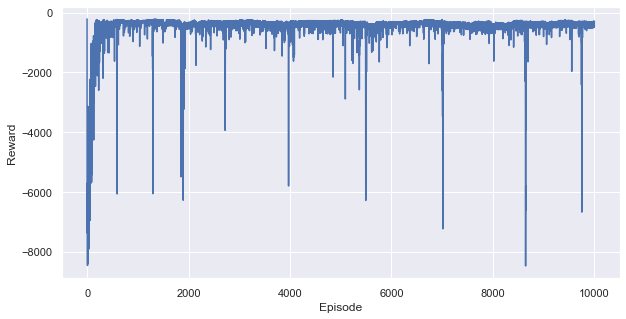

In [15]:
rewards = []

for episode in range(total_episodes):
    # Reset environment at each new episode
    coord = (0,0)
    state = dico_states[coord]
    reward = -grille[0][0]
    done = False
    memory = [coord]

    unit_step = 0
    total_rewards = 0 # just to save progress of learning
    
    for unit_step in range(max_steps):
        
        # Select action according to exploration/exploitation trade-off
        if random.uniform(0,1) > epsilon:
            # exploitation : select action with biggest Q value for this state
            action = np.argmax(qtable[state, :])
        else:
            # exploration: random action choice
            action = random.randint(0,3)
        
        # Do action (a) and observe the outcome state (s') and reward (R)
        coord, reward, done = training_step(grille, coord, action, memory)
        memory.append(coord)
        new_state = dico_states[coord]
        
        # Increment total reward
        total_rewards += reward
    
        '''
        Update q value for the state based on the Bellman equation
        Q(s,a) = Q(s,a) + alpha*[R(s,a) + gamma*max(Q(s',a') - Q(s,a))]
        '''
        qtable[state, action] = qtable[state, action] + \
            alpha * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])
        
        # Increment state
        state = new_state
        
        if coord == (14,14):
            break
    
    # Increment episode
    episode += 1
    
    # Save reward of each step
    rewards.append(total_rewards) 
    
    # Reduce epsilon to reduce the number of exploration for next episodes
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
    
    # Display progree each batch of episodes
    if episode%total_episodes/10 == 0:
        print('training episode',episode)
        
# Plot learning graph
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Reward');

In [16]:
qtable[:20]

array([[-194.03752865, -110.14235182, -224.41655314, -211.67234191],
       [-188.44617455, -212.22807531, -100.36300548, -190.62682553],
       [-358.09796191, -383.81394861, -128.39899281, -388.2720747 ],
       [-379.63631628, -388.73256741, -366.83015396, -358.36994688],
       [-394.41963827, -302.07656874, -356.55235567, -381.70024877],
       [-342.29321693, -358.61040745, -374.08403484, -344.41383764],
       [-348.38737375, -329.15017288, -341.56107202, -371.51419639],
       [-318.51090111, -236.22350615, -316.73134245, -361.63365232],
       [-269.48075894, -243.03827068, -276.4561409 , -261.99929944],
       [-314.85318596, -265.51382383, -288.40865604, -290.18665014],
       [-353.57684665, -338.80308477, -223.23275591, -386.01149257],
       [-357.5068279 , -370.67087467, -339.41836816, -383.73726101],
       [-355.80911506, -406.75743408, -369.42865551, -395.11263575],
       [-373.14312425, -378.3697844 , -361.24626518, -353.14705409],
       [-320.02072291, -343.356987

In [17]:
# Test agent
coord = (0,0)
state = dico_states[coord]
reward = -grille[0][0]
done = False
memory=[coord]

keep_score, keep_coord, keep_state, keep_action = [],[],[],[]
keep_mov = 0

for step in range(max_steps):

    keep_score.append(reward)
    keep_coord.append(coord)
    keep_state.append(dico_states[coord])
    keep_mov += 1

    action = np.argmax(qtable[state, :])
    keep_action.append(action)

    coord, reward, done = training_step(grille, coord, action, memory)
    memory.append(coord)
    new_state = dico_states[coord]
    total_rewards += reward
    
    if coord == (14,14):
        break

    state = new_state

print(keep_action)
print()
print([str(keep_coord[i])+' : '+str(dico_states[keep_coord[i]])for i in range(len(keep_coord))])
print()
print(keep_score)
print('total score:',sum(keep_score)-5)
print('max move:',len(keep_action))

[1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2]

['(0, 0) : 0', '(0, 1) : 1', '(1, 1) : 16', '(1, 2) : 17', '(2, 2) : 32', '(3, 2) : 47', '(4, 2) : 62', '(4, 3) : 63', '(4, 4) : 64', '(4, 5) : 65', '(4, 6) : 66', '(4, 7) : 67', '(4, 8) : 68', '(3, 8) : 53', '(3, 9) : 54', '(3, 10) : 55', '(4, 10) : 70', '(5, 10) : 85', '(5, 11) : 86', '(6, 11) : 101', '(6, 12) : 102', '(7, 12) : 117', '(8, 12) : 132', '(9, 12) : 147', '(10, 12) : 162', '(10, 13) : 163', '(10, 14) : 164', '(11, 14) : 179', '(12, 14) : 194', '(13, 14) : 209']

[-1, -19, -1, -10, -19, -7, -8, -14, -12, -16, -8, -2, -10, -3, -7, -19, -17, -4, -15, -3, -12, -17, -7, -9, -3, -16, -2, -14, -2, -11]
total score: -293
max move: 30


In [18]:
df_path = pd.DataFrame(grille)
score = 0
mov = 0
for coordinate in memory:
    score += df_path.loc[coordinate[0], coordinate[1]]
    mov += 1
    df_path.loc[coordinate[0], coordinate[1]] = '-'+str(df_path.loc[coordinate[0], coordinate[1]])+'-'

print(score)
print(mov)
df_path

293
31


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1-,-19-,9,9,8,18,13,0,13,2,18,18,17,9,0
1,16,-1-,-10-,8,6,16,16,18,14,18,15,17,20,15,17
2,5,3,-19-,14,1,0,3,8,15,12,2,15,15,15,2
3,8,20,-7-,20,6,14,12,4,-3-,-7-,-19-,11,15,8,8
4,15,8,-8-,-14-,-12-,-16-,-8-,-2-,-10-,16,-17-,1,12,0,17
5,0,12,18,13,1,3,2,17,10,7,-4-,-15-,19,8,13
6,2,13,20,1,19,4,1,1,0,14,4,-3-,-12-,2,8
7,11,3,2,20,9,15,1,18,14,13,2,3,-17-,13,20
8,16,5,9,9,5,17,16,4,18,9,1,3,-7-,6,13
9,17,17,1,6,10,3,15,13,7,1,9,10,-9-,18,13
